In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt

In [3]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

customers = pd.read_csv(PATH + 'CUSTOMER.csv')
transactions = pd.read_csv(PATH + 'DAILY_TRANSACTION.csv')
countries = pd.read_csv(PATH + 'REFERENCE_COUNTRY.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#First observations

Customer's database

In [4]:
customers.head()

,CUSTOMER_ID,REGISTER_DATE,CUSTOMER_COUNTRY_CODE,CUSTOMER_AGE,ACQUISITION_SOURCE,CUSTOMER_SEGMENTATION
0,33915789130,2019-12-25T20:12:23.833+01:00,2,>40,Unknown,Segment 1
1,61191108607,2020-02-12T17:04:19.343+01:00,2,31 - 40,Unknown,Segment 3
2,11342493141,2020-02-12T10:32:22.993+01:00,2,>40,Unknown,Segment 2
3,62477786761,2018-09-20T00:52:25.103+02:00,2,21 - 24,Unknown,Segment 2
4,32834850118,2016-11-21T22:04:50.803+01:00,11,21 - 24,Unknown,Segment 2


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38318 entries, 0 to 38317
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CUSTOMER_ID            38318 non-null  int64 
 1   REGISTER_DATE          38318 non-null  object
 2   CUSTOMER_COUNTRY_CODE  38318 non-null  int64 
 3   CUSTOMER_AGE           38318 non-null  object
 4   ACQUISITION_SOURCE     38318 non-null  object
 5   CUSTOMER_SEGMENTATION  38318 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


In [6]:
customers.describe()

,CUSTOMER_ID,CUSTOMER_COUNTRY_CODE
count,3.831800e+04,38318.000000
mean,4.622387e+10,4.034266
std,2.662167e+10,3.764376
min,2.517220e+05,2.000000
25%,2.312765e+10,2.000000
50%,4.626330e+10,2.000000
75%,6.930563e+10,2.000000
max,9.223197e+10,11.000000


Orders database:

In [7]:
transactions.head()

,DATE,CUSTOMER_ID,DEPOSIT_AMOUNT,BET_AMOUNT,WIN_AMOUNT,WITHDRAWAL_AMOUNT
0,2021-06-29,87194400271,30.5,28.25,0.00,0.0
1,2021-06-20,34068618590,7.5,7.50,0.00,0.0
2,2021-07-06,34214925001,0.0,5.70,12.68,10.9
3,2021-05-27,58951177943,0.0,106.92,200.00,0.0
4,2021-06-27,82702456358,7.6,23.60,0.00,0.0


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               40000 non-null  object 
 1   CUSTOMER_ID        40000 non-null  int64  
 2   DEPOSIT_AMOUNT     40000 non-null  float64
 3   BET_AMOUNT         40000 non-null  float64
 4   WIN_AMOUNT         40000 non-null  float64
 5   WITHDRAWAL_AMOUNT  40000 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.8+ MB


In [9]:
transactions.describe()

,CUSTOMER_ID,DEPOSIT_AMOUNT,BET_AMOUNT,WIN_AMOUNT,WITHDRAWAL_AMOUNT
count,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000
mean,4.624367e+10,16.546416,41.632240,34.522033,9.661927
std,2.663041e+10,77.998595,190.109362,329.342955,142.776615
min,2.517220e+05,0.000000,0.000000,0.000000,0.000000
25%,2.315585e+10,0.000000,3.847500,0.000000,0.000000
50%,4.627123e+10,0.000000,10.720000,0.000000,0.000000
75%,6.933781e+10,10.400000,29.450000,15.230000,0.000000
max,9.223197e+10,6888.000000,22524.960000,56337.690000,22250.000000


Countries database

In [10]:
countries.head()

,CUSTOMER_COUNTRY_CODE,CUSTOMER_COUNTRY_LABEL
0,1,BETCLIC.COM
1,2,BETCLIC.FR
2,11,BETCLIC.PT
3,12,BETCLIC.PL
4,3,BETCLIC.IT


In [11]:
countries['CUSTOMER_COUNTRY_LABEL'].unique()

array(['BETCLIC.COM', 'BETCLIC.FR', 'BETCLIC.PT', 'BETCLIC.PL',
       'BETCLIC.IT', 'BETCLIC.SN', 'BETCLIC.CI'], dtype=object)

In [12]:
first = customers.merge(transactions, how='inner', on='CUSTOMER_ID')

In [13]:
first

,CUSTOMER_ID,REGISTER_DATE,CUSTOMER_COUNTRY_CODE,CUSTOMER_AGE,ACQUISITION_SOURCE,CUSTOMER_SEGMENTATION,DATE,DEPOSIT_AMOUNT,BET_AMOUNT,WIN_AMOUNT,WITHDRAWAL_AMOUNT
0,33915789130,2019-12-25T20:12:23.833+01:00,2,>40,Unknown,Segment 1,2021-06-04,0.00,43.00,0.00,0.0
1,61191108607,2020-02-12T17:04:19.343+01:00,2,31 - 40,Unknown,Segment 3,2021-06-28,0.00,5.00,0.00,0.0
2,11342493141,2020-02-12T10:32:22.993+01:00,2,>40,Unknown,Segment 2,2021-07-01,16.95,9.20,0.00,0.0
3,62477786761,2018-09-20T00:52:25.103+02:00,2,21 - 24,Unknown,Segment 2,2021-07-11,0.00,12.10,20.68,0.0
4,32834850118,2016-11-21T22:04:50.803+01:00,11,21 - 24,Unknown,Segment 2,2021-06-30,46.08,57.12,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
39995,56161989762,2019-05-27T14:17:01.76+02:00,2,31 - 40,Unknown,Segment 5,2021-06-18,0.00,1.77,2.63,0.0
39996,22369668803,2021-02-22T06:51:52.533+01:00,2,25 - 30,SEO,Segment 2,2021-05-21,11.60,11.33,0.00,0.0
39997,47996850787,2018-02-04T00:05:26.267+01:00,2,>40,Unknown,Segment 2,2021-06-14,36.40,127.24,0.00,0.0
39998,84782566309,2020-03-04T12:44:23.34+01:00,2,21 - 24,Unknown,Segment 4,2021-06-22,0.00,0.16,0.29,0.0


In [14]:
second = first.merge(countries, how="inner", on="CUSTOMER_COUNTRY_CODE")

In [15]:
second

,CUSTOMER_ID,REGISTER_DATE,CUSTOMER_COUNTRY_CODE,CUSTOMER_AGE,ACQUISITION_SOURCE,CUSTOMER_SEGMENTATION,DATE,DEPOSIT_AMOUNT,BET_AMOUNT,WIN_AMOUNT,WITHDRAWAL_AMOUNT,CUSTOMER_COUNTRY_LABEL
0,33915789130,2019-12-25T20:12:23.833+01:00,2,>40,Unknown,Segment 1,2021-06-04,0.00,43.00,0.00,0.0,BETCLIC.FR
1,61191108607,2020-02-12T17:04:19.343+01:00,2,31 - 40,Unknown,Segment 3,2021-06-28,0.00,5.00,0.00,0.0,BETCLIC.FR
2,11342493141,2020-02-12T10:32:22.993+01:00,2,>40,Unknown,Segment 2,2021-07-01,16.95,9.20,0.00,0.0,BETCLIC.FR
3,62477786761,2018-09-20T00:52:25.103+02:00,2,21 - 24,Unknown,Segment 2,2021-07-11,0.00,12.10,20.68,0.0,BETCLIC.FR
4,57372317116,2020-02-12T21:55:07.31+01:00,2,25 - 30,Unknown,Segment 4,2021-06-16,0.00,7.56,12.79,0.0,BETCLIC.FR
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,6381462269,2019-08-28T01:02:25.18+02:00,11,>40,Unknown,Segment 2,2021-06-12,29.40,2.53,0.00,52.0,BETCLIC.PT
39996,26356493341,2019-11-15T03:10:29.82+01:00,11,18 - 20,Unknown,Segment 3,2021-05-24,0.00,0.41,0.00,0.0,BETCLIC.PT
39997,80976723649,2019-10-05T13:18:10.577+02:00,11,31 - 40,Unknown,Segment 1,2021-06-06,356.00,721.92,626.21,160.0,BETCLIC.PT
39998,80758531414,2021-02-18T00:02:32.077+01:00,11,31 - 40,Organic,Segment 5,2021-06-14,0.00,2.14,0.00,0.0,BETCLIC.PT


Getting KPI's :

First of all let's see the age of our customers and have a look at who is our clientele regarding bets

In [16]:
second["CUSTOMER_AGE"].unique()

array(['>40', '31 - 40', '21 - 24', '25 - 30', '18 - 20'], dtype=object)

In order to make analysis more simple, we replaced the age group above by what would be the closest number to the "median" (for each group).

In [17]:
second = second.replace('>40','40', regex=True)
second = second.replace('31 - 40','35', regex=True)
second = second.replace('21 - 24','23', regex=True)
second = second.replace('25 - 30','27', regex=True)
second = second.replace('18 - 20','19', regex=True)

In [18]:
 second["CUSTOMER_AGE"]= second["CUSTOMER_AGE"].astype(int)

Most of the customers are around 35 years old so they belong to the 31/40 age group.

<AxesSubplot:ylabel='Density'>

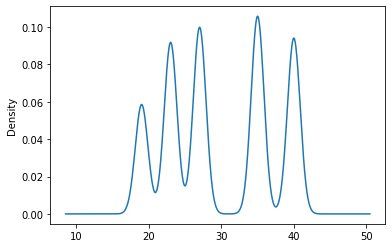

In [19]:
second['CUSTOMER_AGE'].plot(
  kind="density")

<AxesSubplot:>

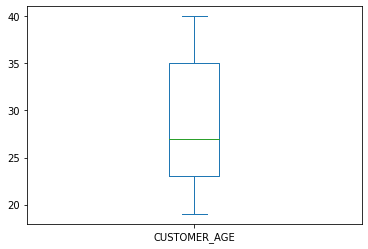

In [20]:
second['CUSTOMER_AGE'].plot(
  kind="box")

What's the turnover for each month? let's calculate it 

In [21]:
second_bis =second
second_bis["DATE"]=second_bis["DATE"].str[0:7]

In [22]:
second_bis

,CUSTOMER_ID,REGISTER_DATE,CUSTOMER_COUNTRY_CODE,CUSTOMER_AGE,ACQUISITION_SOURCE,CUSTOMER_SEGMENTATION,DATE,DEPOSIT_AMOUNT,BET_AMOUNT,WIN_AMOUNT,WITHDRAWAL_AMOUNT,CUSTOMER_COUNTRY_LABEL
0,33915789130,2019-12-25T20:12:23.833+01:00,2,40,Unknown,Segment 1,2021-06,0.00,43.00,0.00,0.0,BETCLIC.FR
1,61191108607,2020-02-12T17:04:19.343+01:00,2,35,Unknown,Segment 3,2021-06,0.00,5.00,0.00,0.0,BETCLIC.FR
2,11342493141,2020-02-12T10:32:22.993+01:00,2,40,Unknown,Segment 2,2021-07,16.95,9.20,0.00,0.0,BETCLIC.FR
3,62477786761,2018-09-20T00:52:25.103+02:00,2,23,Unknown,Segment 2,2021-07,0.00,12.10,20.68,0.0,BETCLIC.FR
4,57372317116,2020-02-12T21:55:07.31+01:00,2,27,Unknown,Segment 4,2021-06,0.00,7.56,12.79,0.0,BETCLIC.FR
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,6381462269,2019-08-28T01:02:25.18+02:00,11,40,Unknown,Segment 2,2021-06,29.40,2.53,0.00,52.0,BETCLIC.PT
39996,26356493341,2019-11-15T03:10:29.82+01:00,11,19,Unknown,Segment 3,2021-05,0.00,0.41,0.00,0.0,BETCLIC.PT
39997,80976723649,2019-10-05T13:18:10.577+02:00,11,35,Unknown,Segment 1,2021-06,356.00,721.92,626.21,160.0,BETCLIC.PT
39998,80758531414,2021-02-18T00:02:32.077+01:00,11,35,Organic,Segment 5,2021-06,0.00,2.14,0.00,0.0,BETCLIC.PT


DATE
2021-05    144990.73
2021-06    391717.72
2021-07    125148.21
Name: DEPOSIT_AMOUNT, dtype: float64

Text(0, 0.5, 'month')

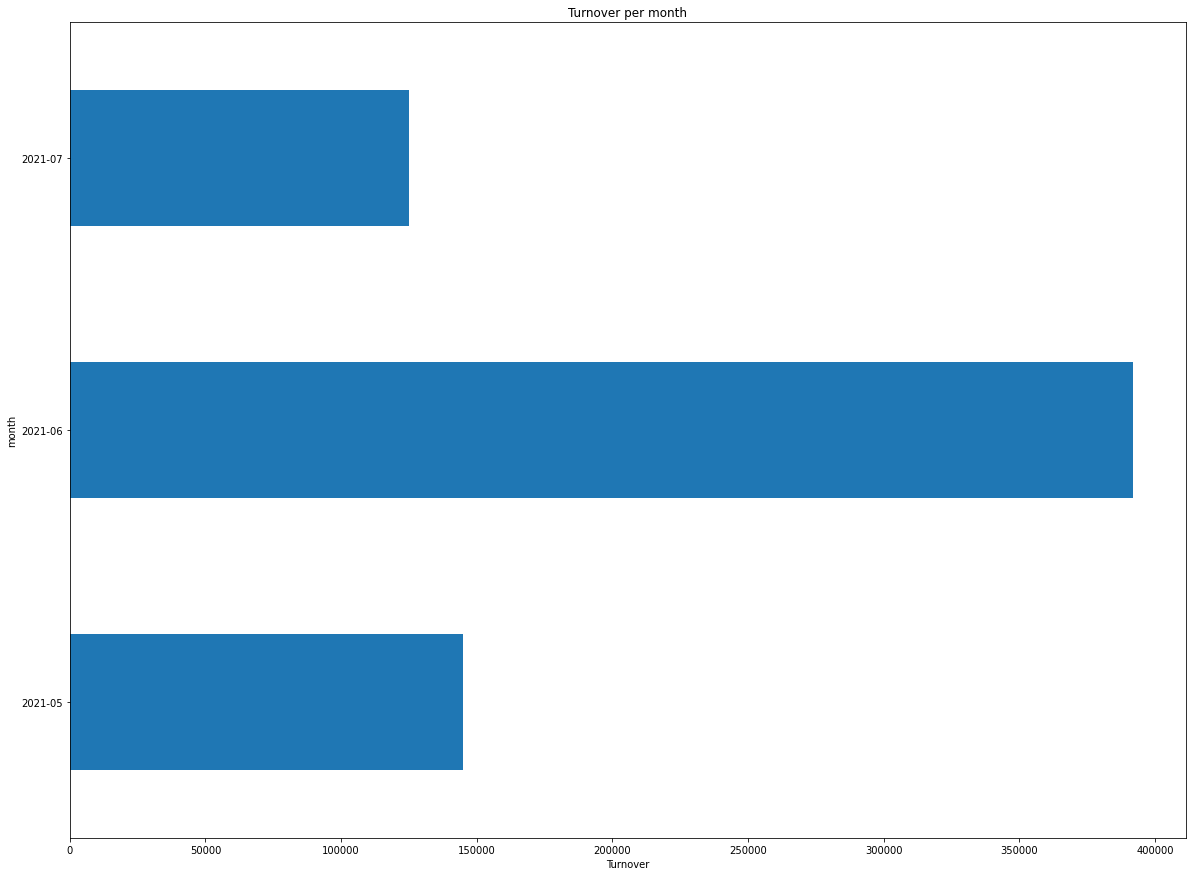

In [23]:
CA=second.groupby(["DATE"])["DEPOSIT_AMOUNT"].sum()
display(CA)
CA.plot.barh(figsize=(20, 15))
plt.pyplot.title("Turnover per month")
plt.pyplot.xlabel("Turnover")
plt.pyplot.ylabel("month")

We see over here the most deposits, so turnovers, during the month of June. We would have to check if any sport event would influence our observations and why we have so much deposits(Champion's league final, Formula 1 Grand Prix, tennis tournament?)

Also, it could be related to a good marketing campaign.

But what's the profit for Betclic? let's calculate it 

DATE
2021-05     38096.53
2021-06    173486.74
2021-07     63796.32
Name: diff, dtype: float64

Text(0, 0.5, 'month')

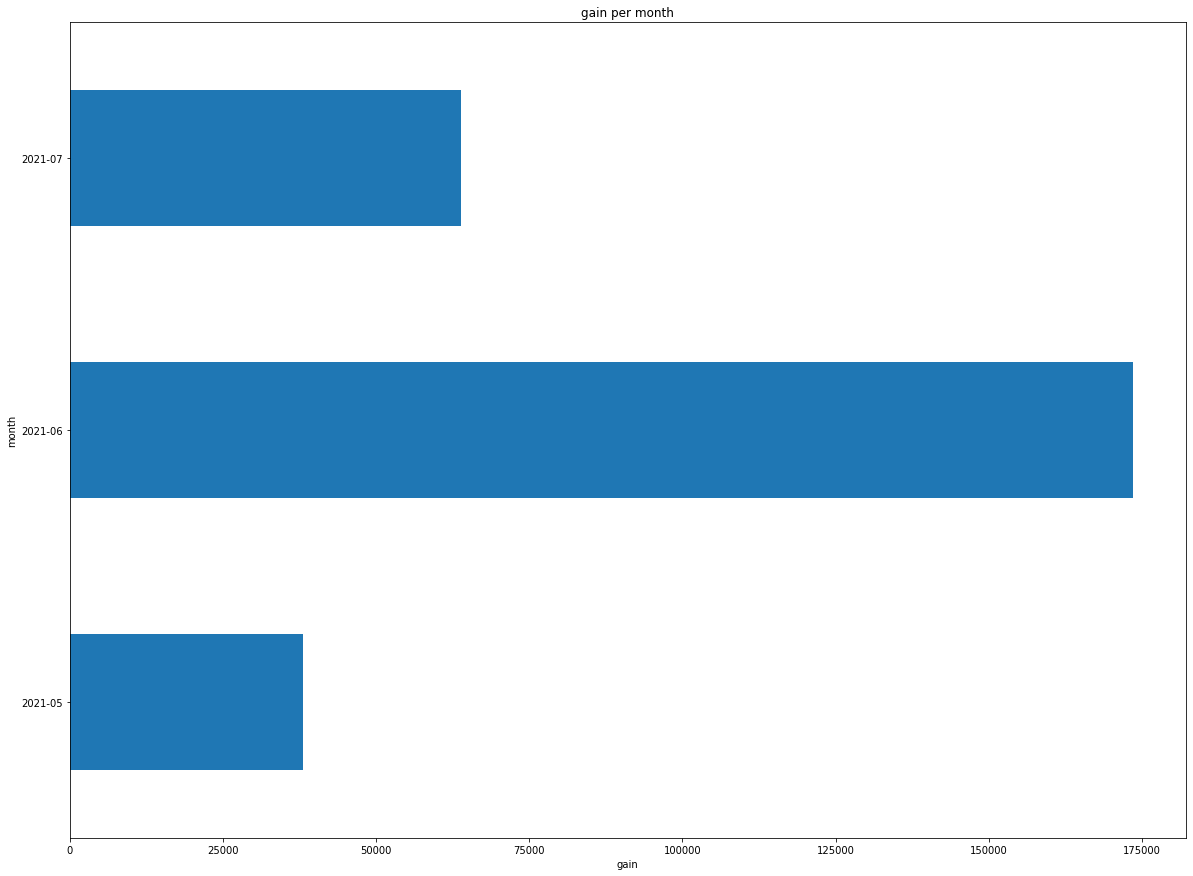

In [24]:
second_bis['diff'] = second_bis['DEPOSIT_AMOUNT'] - second_bis['WITHDRAWAL_AMOUNT']
CA=second.groupby(["DATE"])["diff"].sum()
display(CA)
CA.plot.barh(figsize=(20, 15))
plt.pyplot.title("gain per month")
plt.pyplot.xlabel("gain")
plt.pyplot.ylabel("month")


We can see here there is not a complete relationship between the turnover and the gains for Betclic, why? Because we can have situations where customers win money and make the right bets, so it means our best KPI regarding revenues should be the gains. 

We see a common point though, May is the month that got Betclic the most profit.

In [25]:
second.describe()

,CUSTOMER_ID,CUSTOMER_COUNTRY_CODE,CUSTOMER_AGE,DEPOSIT_AMOUNT,BET_AMOUNT,WIN_AMOUNT,WITHDRAWAL_AMOUNT,diff
count,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,4.624367e+10,4.048850,29.741025,16.546416,41.632240,34.522033,9.661927,6.884490
std,2.663041e+10,3.773887,7.378575,77.998595,190.109362,329.342955,142.776615,153.521626
min,2.517220e+05,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000,-22250.000000
25%,2.315585e+10,2.000000,23.000000,0.000000,3.847500,0.000000,0.000000,0.000000
50%,4.627123e+10,2.000000,27.000000,0.000000,10.720000,0.000000,0.000000,0.000000
75%,6.933781e+10,2.000000,35.000000,10.400000,29.450000,15.230000,0.000000,9.200000
max,9.223197e+10,11.000000,40.000000,6888.000000,22524.960000,56337.690000,22250.000000,6888.000000


Also the highest deposit is 6888 euros, the highest amount bet is 22524,6 euros and the highest amount of money won is 56337 euros. Those values are really far from the mean values that we can notice above. We can then notice that a single bet can really impact the overall revenue of Betclic. We must be cautious of the odds we select for the different sporting events.

Let's see the wins now 

DATE
2021-05    334469.90
2021-06    796104.51
2021-07    250306.90
Name: diff, dtype: float64

Text(0, 0.5, 'month')

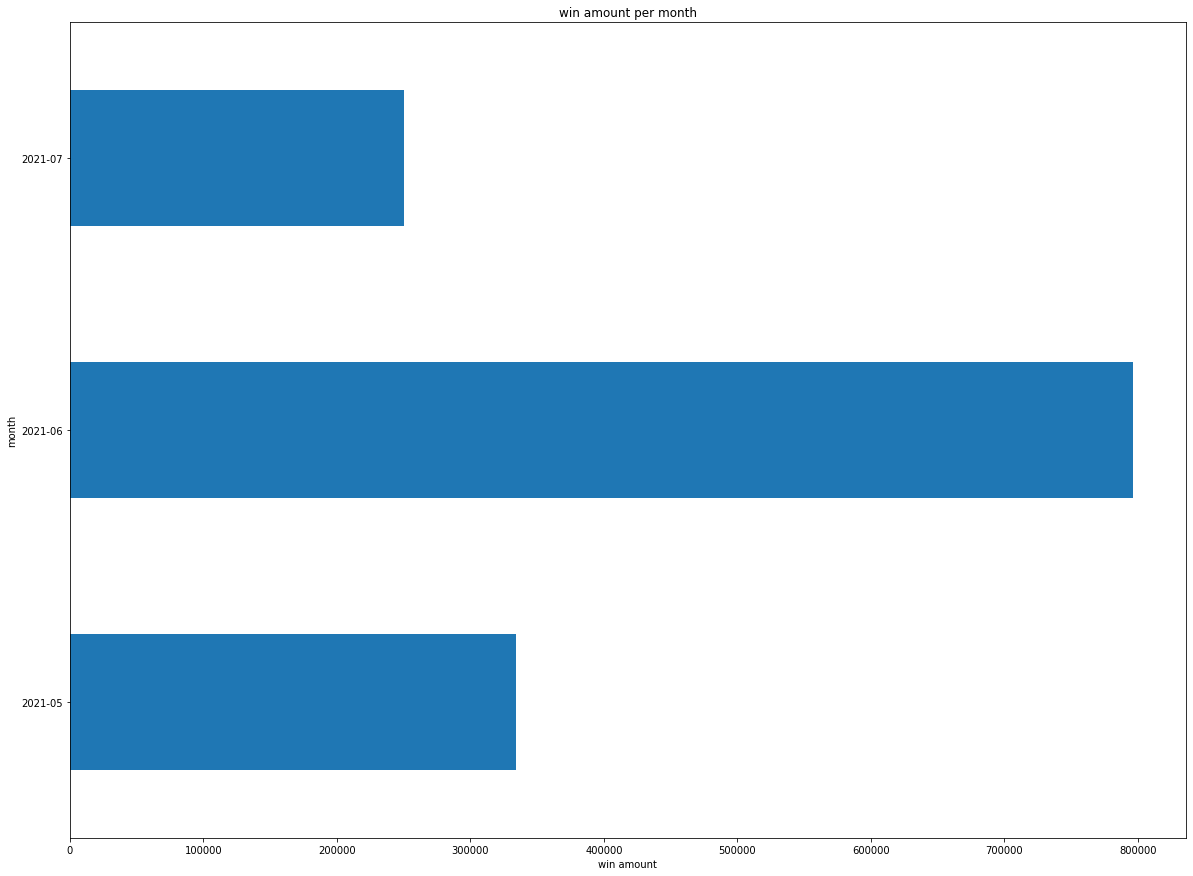

In [26]:
second_bis['diff'] = second_bis['WIN_AMOUNT'] 
CA=second.groupby(["DATE"])["diff"].sum()
display(CA)
CA.plot.barh(figsize=(20, 15))
plt.pyplot.title("win amount per month")
plt.pyplot.xlabel("win amount")
plt.pyplot.ylabel("month")

how to explain the slight disconnect between the win amount and the gain? players who win games and then play again to end up losing their money.
How to optimize revenues? well you could motivate players to play again with the money they just won on a bet before. 

Let's take a look now, from a marketing point of view, to the register date of the different customers and let's compare it to their different bets dates.

In [27]:
second_bis["REGISTER_DATE"]=second_bis["REGISTER_DATE"].str[0:4]
second_bis["DATE_bis"]=second_bis["DATE"].str[0:4]
second["REGISTER_DATE"]= second["REGISTER_DATE"].astype(int)
second["DATE_bis"]= second["DATE_bis"].astype(int)

In [28]:
second_bis

,CUSTOMER_ID,REGISTER_DATE,CUSTOMER_COUNTRY_CODE,CUSTOMER_AGE,ACQUISITION_SOURCE,CUSTOMER_SEGMENTATION,DATE,DEPOSIT_AMOUNT,BET_AMOUNT,WIN_AMOUNT,WITHDRAWAL_AMOUNT,CUSTOMER_COUNTRY_LABEL,diff,DATE_bis
0,33915789130,2019,2,40,Unknown,Segment 1,2021-06,0.00,43.00,0.00,0.0,BETCLIC.FR,0.00,2021
1,61191108607,2020,2,35,Unknown,Segment 3,2021-06,0.00,5.00,0.00,0.0,BETCLIC.FR,0.00,2021
2,11342493141,2020,2,40,Unknown,Segment 2,2021-07,16.95,9.20,0.00,0.0,BETCLIC.FR,0.00,2021
3,62477786761,2018,2,23,Unknown,Segment 2,2021-07,0.00,12.10,20.68,0.0,BETCLIC.FR,20.68,2021
4,57372317116,2020,2,27,Unknown,Segment 4,2021-06,0.00,7.56,12.79,0.0,BETCLIC.FR,12.79,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,6381462269,2019,11,40,Unknown,Segment 2,2021-06,29.40,2.53,0.00,52.0,BETCLIC.PT,0.00,2021
39996,26356493341,2019,11,19,Unknown,Segment 3,2021-05,0.00,0.41,0.00,0.0,BETCLIC.PT,0.00,2021
39997,80976723649,2019,11,35,Unknown,Segment 1,2021-06,356.00,721.92,626.21,160.0,BETCLIC.PT,626.21,2021
39998,80758531414,2021,11,35,Organic,Segment 5,2021-06,0.00,2.14,0.00,0.0,BETCLIC.PT,0.00,2021


In [29]:
second_bis['time_diff']= second_bis['DATE_bis'] - second_bis['REGISTER_DATE']

In [30]:
dfbis= second_bis.sort_values(by=['CUSTOMER_ID'])
display(dfbis)

,CUSTOMER_ID,REGISTER_DATE,CUSTOMER_COUNTRY_CODE,CUSTOMER_AGE,ACQUISITION_SOURCE,CUSTOMER_SEGMENTATION,DATE,DEPOSIT_AMOUNT,BET_AMOUNT,WIN_AMOUNT,WITHDRAWAL_AMOUNT,CUSTOMER_COUNTRY_LABEL,diff,DATE_bis,time_diff
5796,251722,2020,2,19,Unknown,Segment 5,2021-05,0.0,14.25,0.00,0.0,BETCLIC.FR,0.00,2021,1
15301,6093106,2020,2,40,Unknown,Segment 3,2021-06,0.0,2.37,0.00,0.0,BETCLIC.FR,0.00,2021,1
18619,8173091,2020,2,23,Unknown,Segment 2,2021-06,0.0,7.07,0.00,0.0,BETCLIC.FR,0.00,2021,1
4769,8230244,2019,2,19,Unknown,Segment 3,2021-06,22.4,23.80,97.75,62.0,BETCLIC.FR,97.75,2021,2
1042,8578616,2021,2,35,Ad Networks,Segment 3,2021-06,25.5,15.00,0.00,0.0,BETCLIC.FR,0.00,2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,92227794286,2019,2,35,Unknown,Segment 1,2021-07,0.0,117.16,34.92,0.0,BETCLIC.FR,34.92,2021,2
24510,92229369782,2021,2,40,Affiliation,Segment 4,2021-06,0.0,13.05,13.02,0.0,BETCLIC.FR,13.02,2021,0
25239,92230896932,2020,2,40,Unknown,Segment 5,2021-06,43.0,11.04,0.00,0.0,BETCLIC.FR,0.00,2021,1
182,92231419884,2020,2,23,Unknown,Segment 5,2021-06,0.0,9.63,28.26,24.6,BETCLIC.FR,28.26,2021,1


<AxesSubplot:ylabel='Density'>

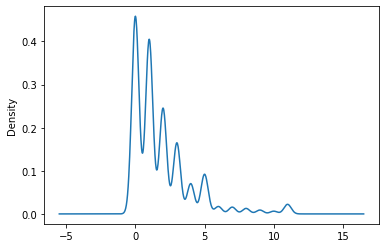

In [31]:
second['time_diff'].plot(
  kind="density")

From our graph above, we notice most of the users play between 0 and 1 year after they registered, so it would be useful to do a marketing campaign for users who lack gambling activity, but it would not be a priority.

Let's see now from which country we have the greatest gains in the world, so we can potentially do marketing campaigns. Initially we see three times more users in France than in Portugal

In [32]:
second["CUSTOMER_COUNTRY_LABEL"].value_counts()


BETCLIC.FR    30894
BETCLIC.PT     9106
Name: CUSTOMER_COUNTRY_LABEL, dtype: int64

CUSTOMER_COUNTRY_LABEL
BETCLIC.FR    245902.66
BETCLIC.PT     29476.93
Name: diff, dtype: float64

Text(0, 0.5, 'country')

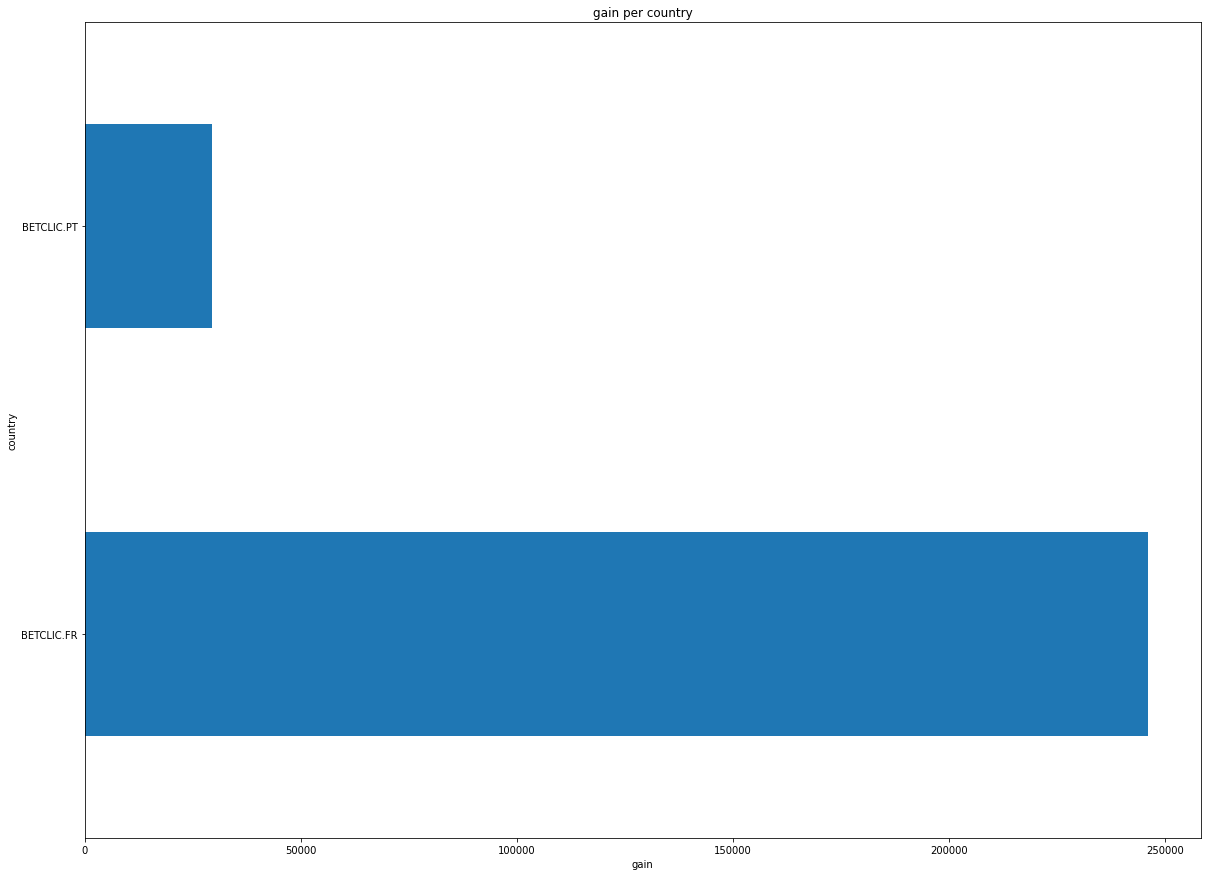

In [33]:
second_bis['diff'] = second_bis['DEPOSIT_AMOUNT'] - second_bis['WITHDRAWAL_AMOUNT']
CA=second.groupby(["CUSTOMER_COUNTRY_LABEL"])["diff"].sum()
display(CA)
CA.plot.barh(figsize=(20, 15))
plt.pyplot.title("gain per country")
plt.pyplot.xlabel("gain")
plt.pyplot.ylabel("country")


CUSTOMER_COUNTRY_LABEL
BETCLIC.FR    514772.94
BETCLIC.PT    147083.72
Name: diff, dtype: float64

Text(0, 0.5, 'country')

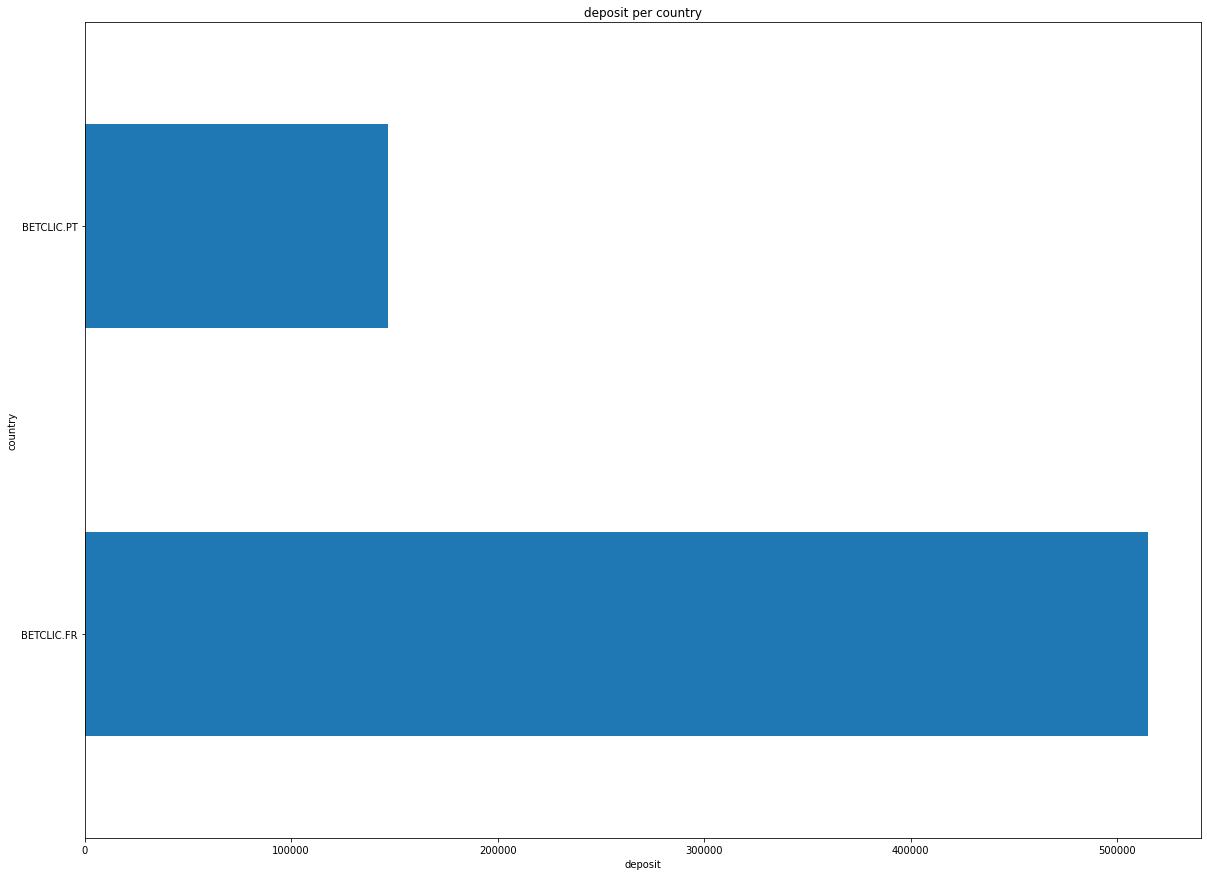

In [34]:
second_bis['diff'] = second_bis['DEPOSIT_AMOUNT'] 
CA=second.groupby(["CUSTOMER_COUNTRY_LABEL"])["diff"].sum()
display(CA)
CA.plot.barh(figsize=(20, 15))
plt.pyplot.title("deposit per country")
plt.pyplot.xlabel("deposit")
plt.pyplot.ylabel("country")


From our graphs above, looking at the deposits and gains, we observe the ratio population/deposits is similar between Portugal and France, but the gain ratio is a lot higher in France. We could potentially say French people play more than in Portugal and then lose more money, which could explain the gains in the end.

# Main Business KPI's

1. Revenue growth

Let's calculate the revenue growth for each month in our database

DATE
2021-05     38096.53
2021-06    173486.74
2021-07     63796.32
Name: diff, dtype: float64

Text(0, 0.5, 'country')

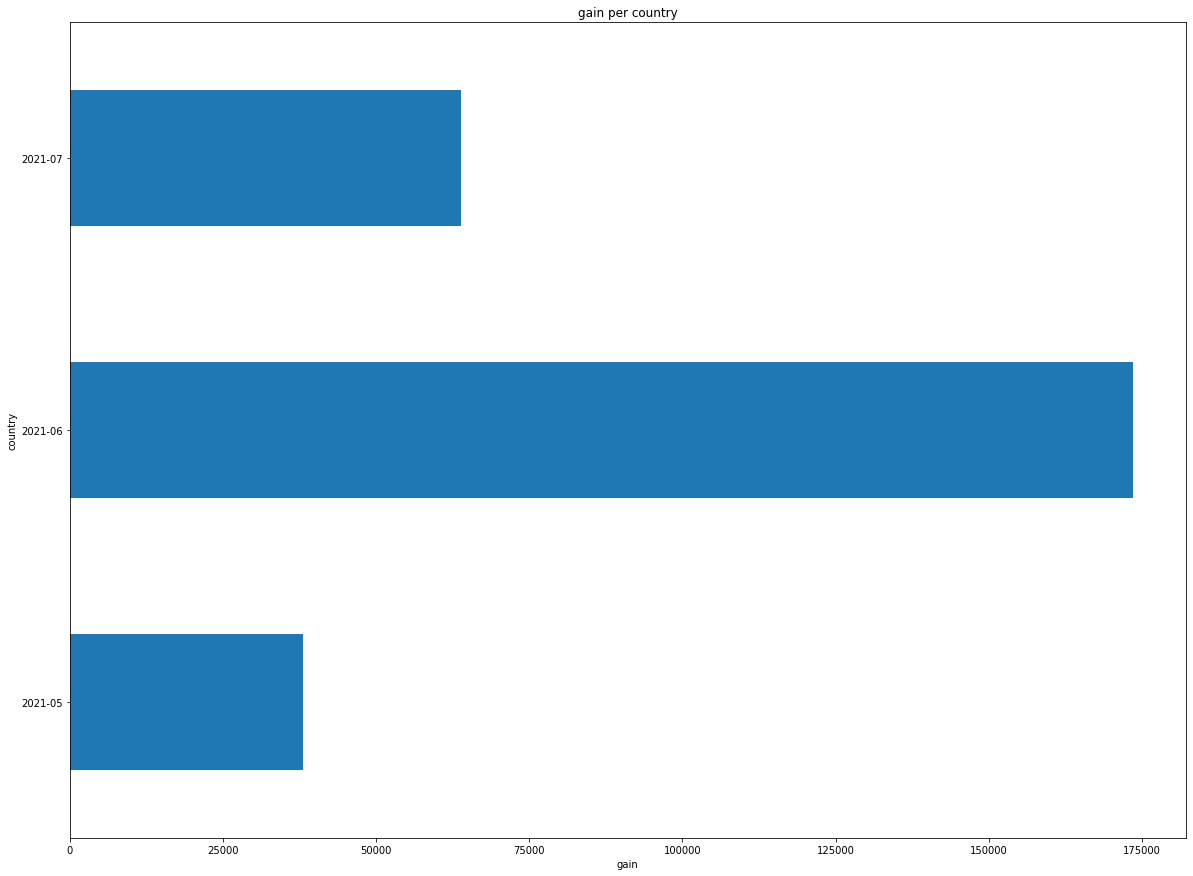

In [35]:
second_bis['diff'] = second_bis['DEPOSIT_AMOUNT'] - second_bis['WITHDRAWAL_AMOUNT']
CA=second.groupby(["DATE"])["diff"].sum()
display(CA)
CA.plot.barh(figsize=(20, 15))
plt.pyplot.title("gain per country")
plt.pyplot.xlabel("gain")
plt.pyplot.ylabel("country")

In [36]:
CA = pd.DataFrame(CA)
CA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2021-05 to 2021-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   diff    3 non-null      float64
dtypes: float64(1)
memory usage: 156.0+ bytes


In [37]:
CA["Revenue growth"] = 100 * (CA["diff"] - CA["diff"].shift()) / abs(CA["diff"].shift())

In [38]:
CA["Revenue growth"]

DATE
2021-05           NaN
2021-06    355.387249
2021-07    -63.226976
Name: Revenue growth, dtype: float64

We can see here that June is the best month in our database.

2.Profit(gain) per client 

In [39]:
customer_bis = second.groupby(["CUSTOMER_ID"])["diff"].sum()
customer_bis = pd.DataFrame(customer_bis).sort_values(by='diff', ascending=False)
display(customer_bis)
customer_bis.info()


,diff
CUSTOMER_ID,
52415283097,6888.00
20535988430,2975.00
17152562750,2744.70
19065577778,2472.00
73777999398,2340.00
...,...
23043688333,-4375.12
9788144552,-5020.05
25195308808,-5155.50


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38318 entries, 52415283097 to 57757925752
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   diff    38318 non-null  float64
dtypes: float64(1)
memory usage: 598.7 KB


In [40]:
customer_bis.describe()

,diff
count,38318.000000
mean,7.186690
std,157.510583
min,-22250.000000
25%,0.000000
50%,0.000000
75%,9.400000
max,6888.000000


Based on the values above, we can see the customer 57757925752 who earned 22250 Euros off Betclic, we should check if there's not any fraud, this outlier looks suspiscious.

Client retention 

In [41]:
second_bis['DATE'].unique()

array(['2021-06', '2021-07', '2021-05'], dtype=object)

In [42]:
firstmonth = second[second['DATE'].str.contains("05")]
midmonth =   second[second['DATE'].str.contains("06")]
lastmonth  = second[second['DATE'].str.contains("07")]

In [43]:
# counting unique values
CS = firstmonth['CUSTOMER_ID'].nunique()
print("No.of.unique values :", 
      CS)

No.of.unique values : 7847


In [44]:
CE = lastmonth['CUSTOMER_ID'].nunique()
print("No.of.unique values :", 
      CE)

No.of.unique values : 7107


In [45]:
print('Betclic lost', (CS-CE),' customers between May and July')

Betclic lost 740  customers between May and July


If we had more information on the customers acquired between May and July, we could then calculate the customer retention rate

Customer satisfaction 

In [46]:
item_counts = second_bis['CUSTOMER_ID'].value_counts()
print(item_counts)

8310108064     4
9867935254     4
29516686845    3
68005066096    3
20479390809    3
              ..
2348097308     1
14846008446    1
65709936052    1
73158262381    1
53406132414    1
Name: CUSTOMER_ID, Length: 38318, dtype: int64


In [47]:
item_counts = pd.DataFrame(item_counts)

In [48]:
item_counts.describe()

,CUSTOMER_ID
count,38318.000000
mean,1.043896
std,0.212985
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [49]:
item_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38318 entries, 8310108064 to 53406132414
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CUSTOMER_ID  38318 non-null  int64
dtypes: int64(1)
memory usage: 598.7 KB


In [50]:
loyal_customers = item_counts.loc[item_counts['CUSTOMER_ID'] >= 2]
display(loyal_customers)

,CUSTOMER_ID
8310108064,4
9867935254,4
29516686845,3
68005066096,3
20479390809,3
...,...
53656552923,2
70432967554,2
44261437117,2
35983372326,2


In [51]:
100 * len(loyal_customers)/len(item_counts)

4.225168328200845

Only 4.23 pourcent of customers make a second bet, so we can conclude that our customers are not willing to play again after their first bet, we need to work on the marketing campaign